## A/B Testing

Data dictionary:

1. Index: Row index
2. user id: User ID (unique)
3. test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
4. converted: If a person bought the product then True, else is False
5. total ads: Amount of ads seen by person
6. most ads day: Day that the person saw the biggest amount of ads
7. most ads hour: Hour of day (out of 24) that the person saw the biggest amount of ads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("marketing_AB.csv")
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [4]:
# Check for duplicates based on user ID
df.duplicated(subset = "user id").sum()

0

In [6]:
# Drop unwanted columns
df.drop(['Unnamed: 0','user id'], axis = 1, inplace=True)
df.head()

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [7]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [11]:
# Categorical variables
df_cat = df[["test group","converted","most ads day","most ads hour"]]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [20]:
# check if categorical variables have correct levels
for i in df_cat.columns:
    print(i.upper() , " : " , df_cat[i].unique())

TEST GROUP  :  ['ad' 'psa']
CONVERTED  :  [False  True]
MOST ADS DAY  :  ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR  :  [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


### Univariate Analysis

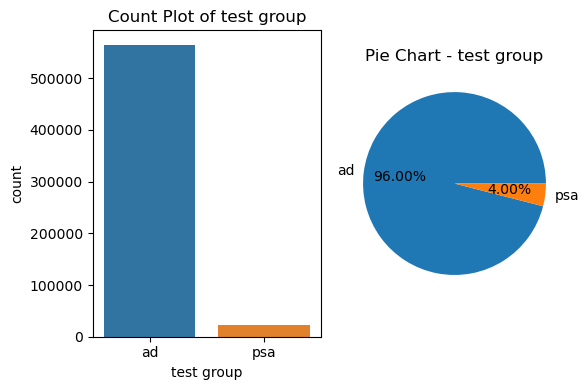

In [21]:
variable = "test group"

plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat)
plt.title(f"Count Plot of {variable}")

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f"Pie Chart - {variable}")

plt.tight_layout()
plt.show()

Observation: 4% of people were shown the public announcement, 96% saw the ad.

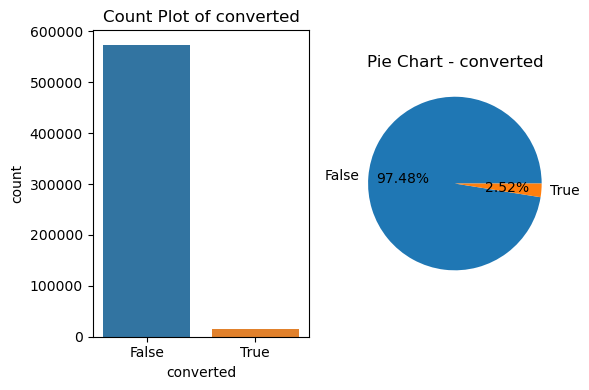

In [29]:
variable = "converted"

plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat)
plt.title(f"Count Plot of {variable}")

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f"Pie Chart - {variable}")

plt.tight_layout()
plt.show()

Observation: Converted column True is skewed with only 2.52% converted. Very Limited Conversion.

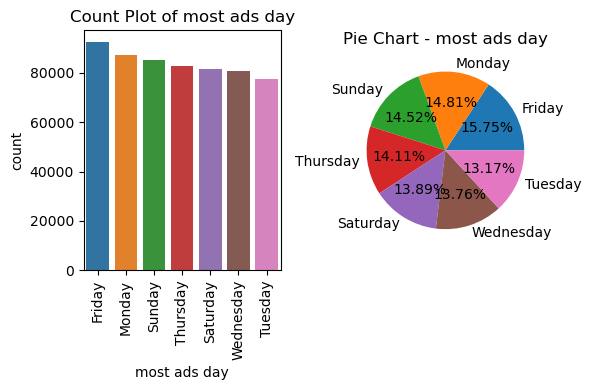

In [34]:
variable = "most ads day"

plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat, order = df_cat['most ads day'].value_counts().index)
plt.title(f"Count Plot of {variable}")
plt.xticks(rotation = 90)

#Pie Chart
plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels = counts.index, autopct='%0.2f%%')
plt.title(f"Pie Chart - {variable}")

plt.tight_layout()
plt.show()

Observation: Maximum ads were seen on Friday

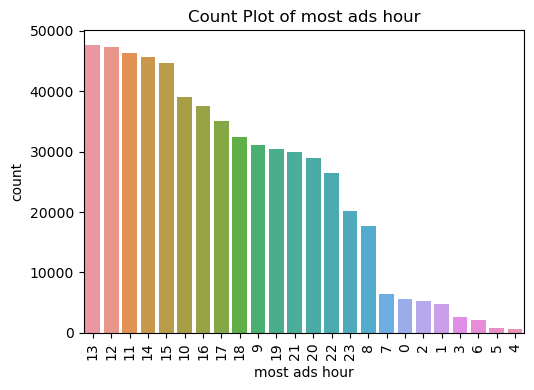

In [39]:
variable = "most ads hour"

plt.figure(figsize=(10,4))
# Count plot
plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat, order = df_cat['most ads hour'].value_counts().index)
plt.title(f"Count Plot of {variable}")
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

Observation: Max ads shown between 11-15 hours. Less ads at night after 12AM

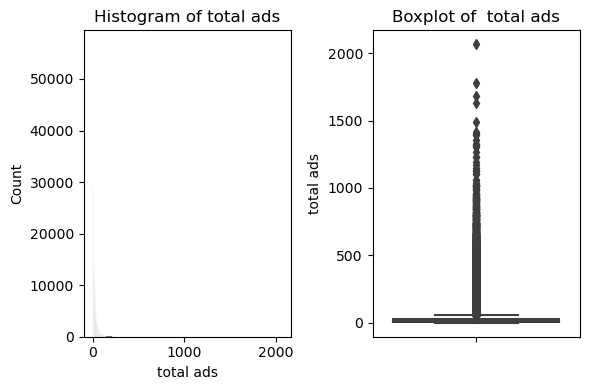

In [42]:
variable = "total ads"

plt.figure(figsize=(6,4))
# Count plot
plt.subplot(1,2,1)
sns.histplot(x = variable, data = df)
plt.title(f"Histogram of {variable}")


#Pie Chart
plt.subplot(1,2,2)
sns.boxplot(y = variable, data = df)
plt.title(f"Boxplot of  {variable}")

plt.tight_layout()
plt.show()

In [43]:
# Let's check the descriptive stats fo this feature
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

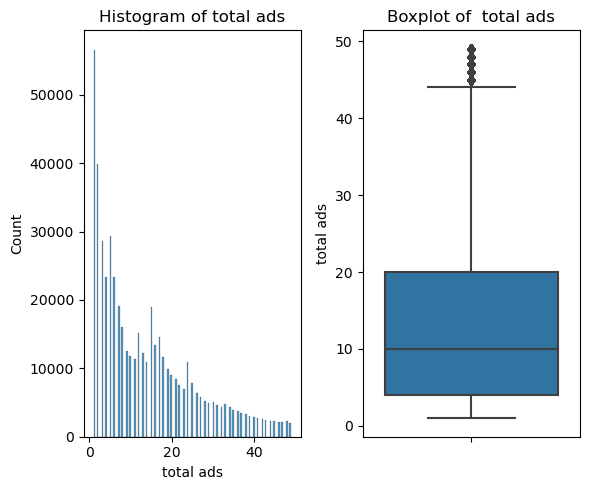

In [47]:
# Let's filter using the above values for better visualization

variable = "total ads"

plt.figure(figsize=(6,5))
# Count plot
plt.subplot(1,2,1)
sns.histplot(x = variable, data = df[df['total ads']<50])
plt.title(f"Histogram of {variable}")


#Pie Chart
plt.subplot(1,2,2)
sns.boxplot(y = variable, data = df[df['total ads']<50])
plt.title(f"Boxplot of  {variable}")

plt.tight_layout()
plt.show()

### Bivariate Analysis

In [48]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [49]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


Observation: Of the people who have seen the ad, only 2.55% converted. Of the people who have seen the psa, only 1.78% converted.

<Axes: xlabel='test group'>

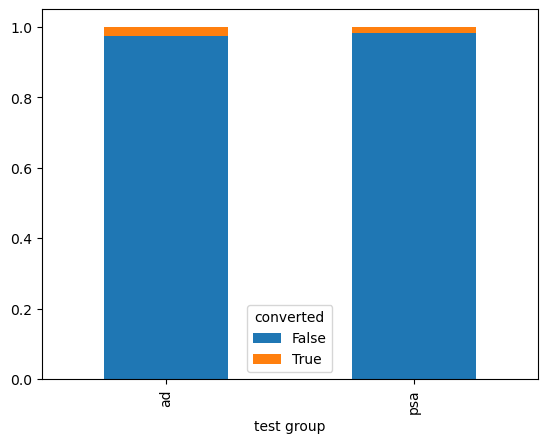

In [50]:
ct_conversion_test_group.plot.bar(stacked = True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

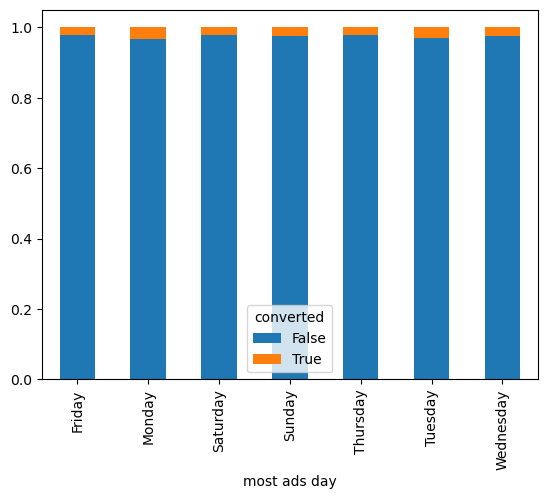

In [52]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize='index')
print(ct_conversion_day.sort_values(by = True, ascending = False))
ct_conversion_day.plot.bar(stacked = True)

Observation: Most conversions came on Monday

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

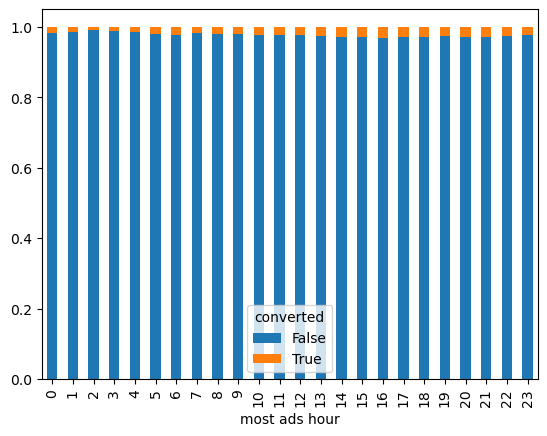

In [54]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = "index")
print(ct_conversion_hour.sort_values(by = True, ascending=False))
ct_conversion_hour.plot.bar(stacked = True)

<Axes: xlabel='converted', ylabel='total ads'>

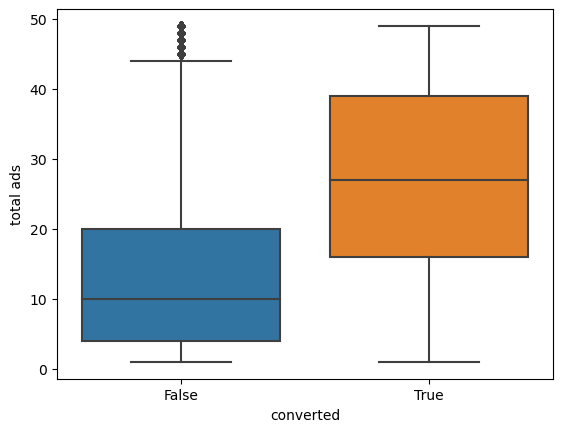

In [55]:
sns.boxplot(x = 'converted', y = "total ads", data = df[df['total ads']<50])

Observation: The people who converted have seen more ads with median of around 25 compared to 10.

### Statistical Significance Test

### Chi-squared Test
When we have two categorical features and are talking about their dependency, we will perform Chi-square test.

- Null H: No difference in conversion rates with respect to categorical variables
- Alternate H: There is difference in conversion rates with respect to categorical variables

We are trying to see the differences that we visually saw, hold true statistically or not.

In [57]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable !='converted':
        # Create a contingency table
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])
        
        # Perform chi-squared test
        chi2,p,_,_ = chi2_contingency(contingency_table)
        
        #Display results
        print(f"\nChi-squared test for {variable} vs. converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")
        
        # Check for significance
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant. Reject Null Hypothesis.")
        else:
            print(f"There is no significant difference in conversion rates across {variable}. Fail to reject Null Hypothesis.")


Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant. Reject Null Hypothesis.

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant. Reject Null Hypothesis.

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant. Reject Null Hypothesis.


Observation: There is statistical evidence that ad days, hours and groups have significant impact. Use earlier visualizations to target customers on particular days and hours.

### Numerical Testing:

- Tested normality (Shapiro test) and equality of variances (Levene's test).
- Assumptions not met, so used Mann-Whitney U Test.
- Confirmed significant differences in ad exposure between converters and non-converters.

#### 1. Normality Assumption (Shapiro-Wilk Test)
- Purpose: To check if the data in each group (converted and not converted) follows a normal distribution.
- Why it's important: Many statistical tests (like the t-test) assume that the data is normally distributed. If this assumption is violated, the results of those tests may not be reliable.

-- How it works:
1. Null Hypothesis (H₀): The data is normally distributed.
2. Alternative Hypothesis (H₁): The data is not normally distributed.

-- If the p-value is less than 0.05, we reject H₀, indicating that the data is not normally distributed.
- Outcome: Determines whether we can proceed with parametric tests (like a t-test) or need to use non-parametric tests (like the Mann-Whitney U test).

#### 2. Equality of Variances (Levene’s Test)
- Purpose: To check if the variances of the two groups (converted and not converted) are equal.
- Why it's important: Some statistical tests (like the independent t-test) assume that the groups being compared have equal variances. If this assumption is violated, a modified version of the test (like Welch’s t-test) or a non-parametric alternative may be needed.

-- How it works:
1. Null Hypothesis (H₀): The variances of the groups are equal.
2. Alternative Hypothesis (H₁): The variances of the groups are not equal.

-- If the p-value is less than 0.05, we reject H₀, indicating that the variances are not equal.
- Outcome: Helps decide whether the assumption of equal variances is satisfied or if adjustments are needed for further analysis.

In [59]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

In [61]:
# Step1: Check Assumptions
# Normality Assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted']==True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted']==False]['total ads'])

print(f"Shapiro-Wilk test for normality (True Group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False Group): p-value = {shapiro_p_value_false}")

# Equality of variances assumption
levene_stat, levene_p_value = levene((df[df['converted']==True]['total ads']), (df[df['converted']==False]['total ads']))
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

C:\Python Folder\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14843.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for normality (True Group): p-value = 1.638680987007864e-98
Shapiro-Wilk test for normality (False Group): p-value = 9.883049430733551e-204
Levene's test for equality of variances: p-value = 0.0


C:\Python Folder\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 573258.
  res = hypotest_fun_out(*samples, **kwds)


In [65]:
# Step2: Perform a suitable test
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # Assumptions of ND and equal variance met, use parametric test -> T-test
    t_stat, t_p_value, ttest_ind(df[df['converted']==True]['total ads'], df[df['converted']==False]['total ads'])
    print(f"Independent two-sample t-test: p-value = {t_p_value}")
else:
    # Assumptions failed, use non-parametric approach -> Mann-Whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(df[df['converted']==True]['total ads'], df[df['converted']==False]['total ads'])
    print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0


**Observation:** This suggests that when it comes to conversion based on ads of people, it does make a difference. The "total ads" seen by users differs significantly between those who converted and those who did not.
The difference is not likely due to random chance, and there is a meaningful pattern in the data.

**Key Findings**
- Ads significantly influence conversion rates compared to PSAs.
Conversion rates depend on:
1. Day of the week.
2. Hour of the day.
- Repeated ad exposure increases conversion likelihood.